In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, auc, roc_curve

In [2]:
x = np.arange(20).reshape(-1, 1)
# LabelEncoded
# Yes -> 1
# No  -> 0
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
np.hstack((x,y.reshape(-1,1)))
# Single Variable - Single Target Classification

array([[ 0,  0],
       [ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 4,  0],
       [ 5,  0],
       [ 6,  0],
       [ 7,  0],
       [ 8,  1],
       [ 9,  1],
       [10,  1],
       [11,  1],
       [12,  1],
       [13,  1],
       [14,  1],
       [15,  1],
       [16,  1],
       [17,  1],
       [18,  1],
       [19,  1]])

In [4]:
model = LogisticRegression(solver='liblinear', penalty='l2', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
model.classes_

array([0, 1])

In [7]:
model.predict_proba(x)

array([[0.84535736, 0.15464264],
       [0.7994534 , 0.2005466 ],
       [0.74404897, 0.25595103],
       [0.67947492, 0.32052508],
       [0.60720984, 0.39279016],
       [0.52992369, 0.47007631],
       [0.45117535, 0.54882465],
       [0.37479888, 0.62520112],
       [0.30418564, 0.69581436],
       [0.24173229, 0.75826771],
       [0.18862544, 0.81137456],
       [0.14495541, 0.85504459],
       [0.11002474, 0.88997526],
       [0.0826974 , 0.9173026 ],
       [0.06168701, 0.93831299],
       [0.04574838, 0.95425162],
       [0.03377969, 0.96622031],
       [0.02486068, 0.97513932],
       [0.01825211, 0.98174789],
       [0.01337616, 0.98662384]])

In [8]:
np.argmax(model.predict_proba(x), axis=1)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [9]:
print(model.predict(x))
print(y)

[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
# Here score is Corrects over Total (Accuracy)
model.score(x, y)

0.9

In [11]:
y_p = model.predict(x)

In [12]:
cm = confusion_matrix(y, y_p)
cm

array([[ 6,  2],
       [ 0, 12]], dtype=int64)

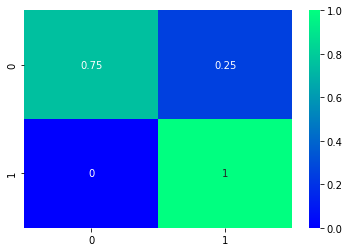

In [13]:
cm_normal = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_normal, annot=True, cmap='winter');

In [14]:
print(classification_report(y, y_p))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



In [15]:
TP_0 = 6
FP_0 = 0

p_0 = TP_0 / (TP_0+FP_0)
p_0

1.0

In [16]:
TP_1 = 12
FP_1 = 2

p_1 = TP_1 / (TP_1+FP_1)
p_1

0.8571428571428571

In [19]:
y_proba = model.predict_proba(x)
y_proba

array([[0.84535736, 0.15464264],
       [0.7994534 , 0.2005466 ],
       [0.74404897, 0.25595103],
       [0.67947492, 0.32052508],
       [0.60720984, 0.39279016],
       [0.52992369, 0.47007631],
       [0.45117535, 0.54882465],
       [0.37479888, 0.62520112],
       [0.30418564, 0.69581436],
       [0.24173229, 0.75826771],
       [0.18862544, 0.81137456],
       [0.14495541, 0.85504459],
       [0.11002474, 0.88997526],
       [0.0826974 , 0.9173026 ],
       [0.06168701, 0.93831299],
       [0.04574838, 0.95425162],
       [0.03377969, 0.96622031],
       [0.02486068, 0.97513932],
       [0.01825211, 0.98174789],
       [0.01337616, 0.98662384]])

In [20]:
# ROC: Receiver Operating Characteristic (TPR/FPR)
# AUC: Area Under the Curve
# ROC of Class 0
fpr, tpr, _ = roc_curve(y, y_proba[:,0], pos_label=0, drop_intermediate=True)
roc_auc = auc(fpr, tpr)
display(tpr)
display(fpr)
print(roc_auc)

array([0.   , 0.125, 1.   , 1.   ])

array([0., 0., 0., 1.])

1.0


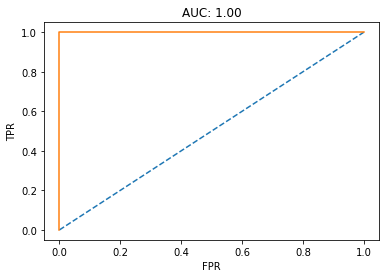

In [21]:
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC: {:.2f}".format(roc_auc))
plt.show()